<a href="https://colab.research.google.com/github/Oh-Huiseok/Finn/blob/Test/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install -q torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# 모델 이름
model_name = "ProsusAI/finbert"

# 토크나이저 및 모델 불러오기
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 파이프라인 생성 (감성 분석용)
finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cuda:0
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
# 예제 문장
text = "Tesla shares rose after the company posted strong quarterly earnings."

# 감성 예측
result = finbert(text)
print(result)


[{'label': 'positive', 'score': 0.9517207741737366}]


In [ ]:
# Colab에 kaggle.json 업로드
from google.colab import files
files.upload()  # 여기서 kaggle.json 선택

# .kaggle 폴더로 옮기기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# 권한 설정
!chmod 600 ~/.kaggle/kaggle.json

# 필요한 데이터셋 다운로드
!kaggle datasets download -d journeyyouyeonkim/microsoft-tesla-finance-news-articles2020-2024

# 압축 해제
!unzip microsoft-tesla-finance-news-articles2020-2024.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/journeyyouyeonkim/microsoft-tesla-finance-news-articles2020-2024
License(s): other
Archive:  microsoft-tesla-finance-news-articles2020-2024.zip
  inflating: msft_articles.csv       
  inflating: tsla_articles.csv       


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("tsla_articles.csv")

# 앞 5개 행 확인
df.head()

,Unnamed: 0,date,text
0,0,2021-01-27,The company benefited from a jump in sales of ...
1,1,2021-01-19,"Rivian, which has raised another $2.65 billion..."
2,2,2021-01-15,Traditional automakers have struggled to sell ...
3,3,2021-01-22,The pandemic dampened sales for all automakers...
4,4,2021-01-07,Mr. Musk’s net worth was $188.5 billion at 10:...


In [ ]:
subset = df[['date', 'text']].copy()

# 감성 분석 함수 정의
def analyze_sentiment(text):
    result = finbert(text[:512])[0]
    return pd.Series([result['label'], round(result['score'], 4)])

# sentiment와 confidence 컬럼 생성
subset[['sentiment', 'confidence']] = subset['text'].apply(analyze_sentiment)

# 텍스트는 제거하고 최종 결과만 남김
final_df = subset[['date', 'sentiment', 'confidence']]



In [ ]:
final_df = final_df.sort_values(by='date', ascending=True).reset_index(drop=True)

In [ ]:
print(final_df.head(5))
print(final_df.tail(5))

         date sentiment  confidence
0  2020-01-01   neutral      0.7914
1  2020-01-03  positive      0.9486
2  2020-01-04  positive      0.5147
3  2020-01-09   neutral      0.8901
4  2020-01-10   neutral      0.7793
            date sentiment  confidence
1409  2024-06-21   neutral      0.9247
1410  2024-06-24  negative      0.8650
1411  2024-06-25   neutral      0.6824
1412  2024-06-25  negative      0.9559
1413  2024-06-28   neutral      0.6805


In [ ]:
from google.colab import files
files.upload()  # 여기서 kaggle.json 업로드
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 해당 테슬라 주가 데이터셋 다운로드
!kaggle datasets download -d iamtanmayshukla/tesla-stocks-dataset

# 압축 풀기
!unzip tesla-stocks-dataset.zip


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/iamtanmayshukla/tesla-stocks-dataset
License(s): CC0-1.0
Archive:  tesla-stocks-dataset.zip
  inflating: HistoricalData_1726367135218.csv  
  inflating: TSLA-2.csv              
  inflating: tsla_2025.csv           


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("TSLA-2.csv")

# 앞 5개 행 확인
df.head()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2024-08-16,211.149994,219.800003,210.800003,216.119995,216.119995,88765100
3558,2024-08-19,217.070007,222.979996,214.089996,222.720001,222.720001,76435200
3559,2024-08-20,224.880005,228.220001,219.559998,221.100006,221.100006,74001200
3560,2024-08-21,222.669998,224.660004,218.860001,223.270004,223.270004,70146000
3561,2024-08-22,223.820007,224.800003,210.320007,210.660004,210.660004,79337500


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
filtered_stock = df[
    (df['Date'] >= '2020-01-01') &
    (df['Date'] <= '2024-07-5')
].copy()


In [ ]:
filtered_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2394,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2395,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2396,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2397,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2398,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [ ]:
# 감정 데이터와 주가 데이터 모두 datetime 형식으로 통일
final_df['date'] = pd.to_datetime(final_df['date'])
filtered_stock['Date'] = pd.to_datetime(filtered_stock['Date'])


In [ ]:
merged = pd.merge(
    final_df,          # 감정 분석 데이터 (왼쪽 기준)
    filtered_stock,          # 주가 데이터
    how='left',        # 감정 날짜 기준으로 붙이고, 주가 없으면 NaN
    left_on='date',
    right_on='Date'
)


In [ ]:
merged.drop(columns=['Date'], inplace=True)


In [ ]:
merged.tail(10)

NameError: name 'merged' is not defined

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 데이터프레임: df (이미 날짜 포함)
# 컬럼: 'date', 'sentiment', 'confidence'


In [ ]:
df = merged
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [ ]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)


In [ ]:
weights = np.linspace(1.0, 0.1, 7)  # 1.0 → 0.1까지 7단계로 줄어듦


In [ ]:
df['sentiment_influence'] = 0.0


In [ ]:
for date, row in tqdm(df.iterrows(), total=len(df)):
    # neutral 또는 NaN은 건너뜀
    if pd.isna(row['sentiment_score']) or pd.isna(row['confidence']):
        continue

    base = row['sentiment_score'] * row['confidence']

    # 7일 동안 가중치 적용해서 누적
    for i in range(7):
        apply_date = date + pd.Timedelta(days=i)
        if apply_date in df.index:
            df.at[apply_date, 'sentiment_influence'] += base * weights[i]


100%|██████████| 1414/1414 [00:03<00:00, 364.73it/s]


In [ ]:
df[['sentiment', 'confidence', 'sentiment_score', 'sentiment_influence']].head(15)


,sentiment,confidence,sentiment_score,sentiment_influence
date,,,,
2020-01-01,neutral,0.7914,0,0.000000
2020-01-03,positive,0.9486,1,0.948600
2020-01-04,positive,0.5147,1,1.321010
2020-01-09,neutral,0.8901,0,0.223535
2020-01-10,neutral,0.7793,0,0.051470
2020-01-14,positive,0.7628,1,0.762800
2020-01-21,negative,0.9560,-1,-0.956000
2020-01-22,neutral,0.9298,0,-0.812600
2020-01-22,neutral,0.7810,0,-0.812600


In [ ]:
features = ['sentiment_influence', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
target   = 'Close'
data = df[ features + [target] ].dropna()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)


In [ ]:
import numpy as np

def create_sequences(arr, seq_len):
    X, y = [], []
    for i in range(len(arr) - seq_len):
        X.append(arr[i:i+seq_len, :-1])   # 모든 피처
        y.append(arr[i+seq_len, -1])      # Close만
    return np.array(X), np.array(y)

SEQ_LEN = 10
X, y = create_sequences(scaled, SEQ_LEN)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, X.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,241 (71.25 KB)

 Trainable params: 18,241 (71.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1022 - val_loss: 0.0013
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 8.7620e-04
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.4660e-04
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.0224e-04
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 8.5056e-04
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 8.8625e-04
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 7.9510e-04
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 7.7692e-04
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13m

In [ ]:
# X_val: (샘플수, seq_len, 피처수)
# y_val: (샘플수,)
y_pred = model.predict(X_val)  # 예측값 (스케일된 종가)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# MSE, MAE
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")


MSE: 0.00061
RMSE: 0.02462
MAE: 0.01829


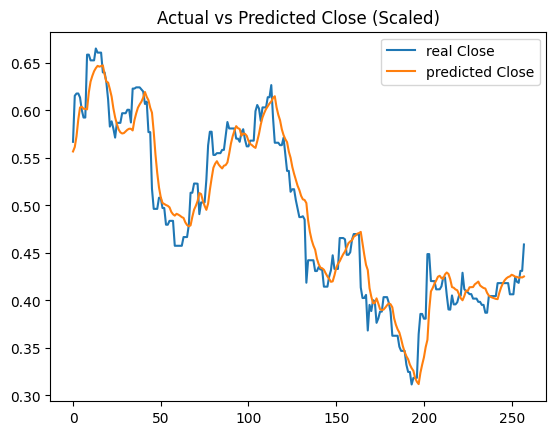

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_val, label="real Close")
plt.plot(y_pred, label="predicted Close")
plt.title("Actual vs Predicted Close (Scaled)")
plt.legend()
plt.show()
